#Taitanic (Kaggle)

## 1. Load packages

In [ ]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

#한글 폰트 사용 : vscode , window
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#마이너스 깨지는 경우 처리
matplotlib.rcParams['axes.unicode_minus'] = False 
import seaborn as sns
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

##2.Dataset
+ taitanic 데이터가져오기
+ taitanic 데이터의 행과 열 구하기
+ taitanic 데이터의 상위 열 보기
+ taitanic 데이터의 통계정보 보기

#### 파이썬 기초

In [ ]:
#파일 읽기
with open('/content/drive/My Drive/PythonWork/PythonBasic/work/10/taitanic.csv', 'r') as fp:
    data = fp.readlines()

print(type(data))

<class 'list'>


In [ ]:
#리스트 항목 가져오기 : 첫줄 제거 
data = data[1:]
print(data[:3])

['1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n', '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n', '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n']


##### 항목이름
'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [ ]:
#0:사망, 1:생존
Survived = []
Sex = [] 
for line in data :
    item = line.replace('\n','')
    item = item.split(',')
    Survived.append(int(item[1])) #형변환해야함 
    Sex.append(item[-8]) #이름에 ,가 있어서 뒤쪽에서 항목을 찾음 

print(Survived)
print(Sex)


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [ ]:
#생존율 
rate = sum(Survived) / len(Survived) * 100
print(f'생존율 : {rate:0.2f} %')

생존율 : 38.38 %


In [ ]:
#생존자와 사망자 수 
Survived0 = Survived.count(0)
Survived1 = Survived.count(1)

print(Survived0)
print(Survived1)

549
342


In [ ]:
#성별인원수
sexdt = {'male':0, 'female':0}
sexdt['male'] = Sex.count('male')
sexdt['female'] = Sex.count('female')
print(sexdt)

{'male': 577, 'female': 314}


In [ ]:
#성별 사망자와 생존자 리스트 생성 


In [ ]:
len(Survived)

891

In [ ]:
Sex[0]

'male'

In [ ]:
Survived[0]

0

In [ ]:
sexdt = {'male':[0,0], 'female':[0,0]}
for idx in range(len(Survived)) :
    if (Sex[idx] == 'male' and Survived[idx] == 0 ) : sexdt['male'][0] =  sexdt['male'][0] + 1 
    elif (Sex[idx] == 'male' and Survived[idx] == 1 ) : sexdt['male'][1] =  sexdt['male'][1] + 1 
    elif (Sex[idx] == 'female' and Survived[idx] == 0 ) : sexdt['female'][0] =  sexdt['female'][0] + 1 
    elif (Sex[idx] == 'female' and Survived[idx] == 1 ) : sexdt['female'][1] =  sexdt['female'][1] + 1 

sexdt

{'female': [81, 233], 'male': [468, 109]}

In [ ]:
sexdt = {'male':(0,0), 'female':(0,0)}

sexdt['female'] = list(sexdt['female'])
sexdt['male'] = list(sexdt['male'])

for idx in range(len(Survived)) :
    sexdt[Sex[idx]][Survived[idx]] =  sexdt[Sex[idx]][Survived[idx]] + 1 

sexdt['female'] = tuple(sexdt['female'])
sexdt['male'] = tuple(sexdt['male'])
sexdt

{'female': (81, 233), 'male': (468, 109)}

In [ ]:
#딕션너리 -> 데이터프레임으로 변경 
dt = pd.DataFrame(sexdt)
dt

,male,female
0,468,81
1,109,233


In [ ]:
dt.index = ['사망자', '생존자']
dt

,male,female
사망자,468,81
생존자,109,233


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

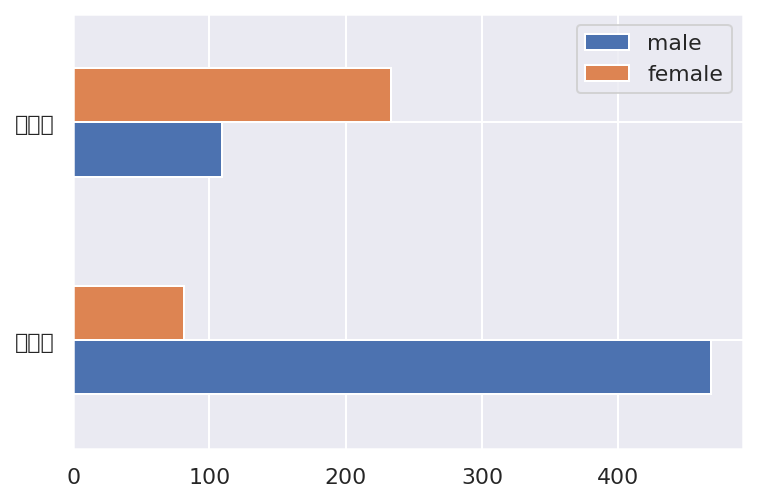

In [ ]:
dt.plot(kind='barh')
plt.show()

#### 판다스 기초

In [ ]:
train = pd.read_csv("/content/drive/My Drive/PythonWork/PythonBasic/work/10/taitanic.csv") 
print("train shape : ", train.shape) 


train shape :  (891, 12)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train['Survived'].mean()

0.3838383838383838



---


## 탐색적 데이터 분석 (EDA : Exploratory Data Analysis)


---




### 탐색적 데이터 분석 (EDA) 이란


+ 데이터를 수집했을때 이를 다양한 각도에서 관찰하고 이해하는 과정
+ 데이터의 분포 및 값을 검토하여 수집한 데이터가 어떤 것을 나타내는지를 더 잘 이해하고, 수집한 데이터에 대한 잠재적인 문제를 발견하여 본격적인 분석에 들어가기 전에 수집의사를 결정하고 판단


### 분석과정


 - 1) 분석의 목적과 변수가 무엇이 있는지 확인하고 개별 변수의 이름이나 설명을 갖는지 확인
   - 데이터가 어떤 용도로 만들어졌는지, 무엇을 설명하고자 하는지 확인하고
여러가지 질문이나 가설을 세움
 - 2) 데이터를 전체적으로 확인
   - 데이터에 문제가 있는지 없는지를 확인
   - 추가적으로 다양하게 데이터를 탐색
   - 수집한 데이터가 어떤 부분이 소실되어 결측값으로 나타나는지 확인
   - 어떠한 변수에 이상치를 갖고 있는지 확인
 - 3) 데이터의 개별 속성값을 관찰
   - 각 속성별로 갖고 있는 값이 예측한 범위와 분포를 갖는지를 확인
   - 그렇지 않다면 어떠한 이유로 예측한 범위와 분포를 갖고 있지 않은지를 확인
 - 4)속성 간의 관계에 초첨을 맟추어 개별 속성 관찰에서 찾아내지 못했던 패턴을 찾음
   - 예를 들면 상관관계의 시각화를 통해서 각각의 변수가 어떤 관계를 갖는지 확인


### 데이터의 유형 파악


데이터를 살펴보면서 변수의 의미나 방법 등을 확인하며, 데이터의 형태를 판단
 - 1) 수치형 자료로 보이지만 실상은 명목형 자료인 경우
  -  이 경우엔 해당 변수를 대신해서 정보를 따로 담고 있는 새로운 변수를 사용
 - 2) 명목형 자료로 보이지만 실상은 순서형 자료인 경우
  - 이 경우엔 해당 변수를 수치형 변수로 변환
 - 3) 합쳐서 하나로 만들 수 있는 변수인 경우 
  - 이 경우에는 해당 변수들을 합쳐서 조정
 - 4) 여러개로 나눌 수 있는 변수인 경우 
  - 이 경우에는 해당 변수를 나눠서 조정
 - 5) 결측값인지 0인지 분간이 힘든 관측치
  - 이 경우에는 다른 변수들과 비교하면서 살펴봄


### EDA의 형태


 - 1) 그림으로 표현할지 여부에 따라서 : 데이터의 분포를 확인하고자 한다면 그림이 더 적합하고, 정확한 값을 필요하다면 수치로 표현하는 것이 더 적합해.

 - 2) 단일변량 여부에 따라서 : 변수를 하나씩 확인할 것인지, 여러 변수를 동시에 확인할 것인지 여부
+ EDA 형태 분류
 - 1) 단일변량이면서 수치로 표현하고자 하는 경우
    - 범주형 자료 : 값의 범위, 빈도를 찾고자 할 때 빈도표를 작성하여 표현: 결측치가 존재한다면 비율이 100퍼센트가 안되기에 결측치의 유무를 판단할 수 있고, 구성비율을 파악할 수 있음
    - 양적 자료 : 개략적인 분포를 파악, 통계량(sample statistics)  
: 통계량의 중심위치(평균, 중위수 등)를 보고 자료의 치우친 정도를 판단하고,
산포(표준편차, IQR)를 통해서 퍼진 정도를 파악
 - 2) 단일변량이면서 그림으로 표현하고자 하는 경우  
    - 히스토그램 : 히스토그램을 통해서 자료의 분포가 어떻게 되는지, 어떤 모형을 가정할지, 이상치의 여부 등을 판단가능하고 연속형 데이터에 사용하면 전체적인 분포를 파악
    - 막대그래프 : 범주형 자료의 분포 파악할 수 있으며, 연속형 데이터에 사용하면 전체적인 분포를 파악
    - 상자그림 : 이상치 판단, 자료의 치우침 여부 판단
    - QQplot : 표본이 정규분포에 근사시킬 수 있는지 여부를 판단할 때 사용
 - 3) 다변량이면서 수치로 표현하는 경우
    - 교차표 :범주형 자료에 사용되며, 각 행과 열에 변수를 지정하여 사용하며, 각 셀의 빈도나 비율을 파악
    - 공분산과 상관계수 : 두 변수가 양적 변수인 경우에 두 변수의 선형의 상관성에 대해서 판단할 때 사용
 - 4) 다변량이면서 그림으로 표현하는 경우
    - 산점도 : 변수가 양적 변수인 경우, 종속 변수를 y축에 두고 그리며 변수의 관계를 나타냄


##3.EDA

### 타이타닉 데이터 항목 


- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 객실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 승선한 항구명(C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 목적변수(target value) 확인
+ 생존여부(Survival) 열 자료 파악
+ 비율 그래프 그리기

In [ ]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

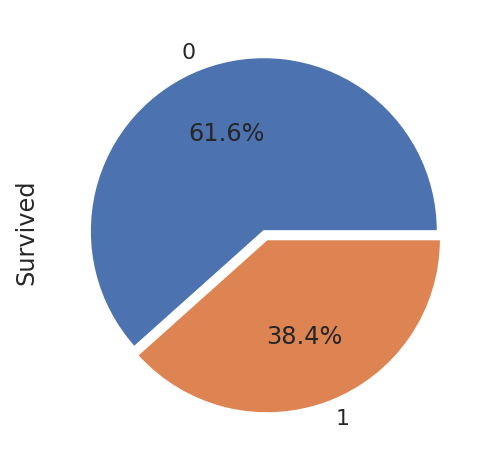

In [ ]:
#explode : 파이챠트 내의 파이 간격
#autopct : 파이전체 대비 백분율
train['Survived'].value_counts().plot(kind='pie',explode=[0,0.05],autopct='%1.1f%%') 

plt.show()

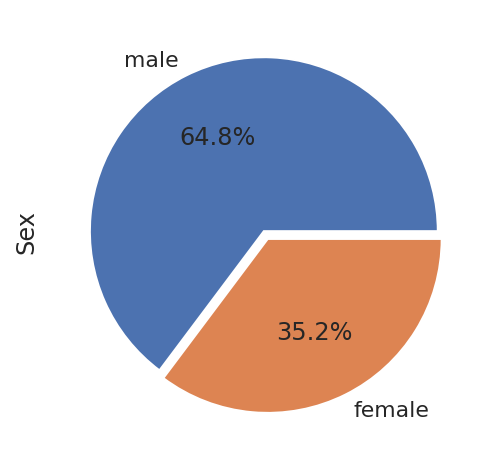

In [ ]:
train['Sex'].value_counts().plot(kind='pie',explode=[0,0.05],autopct='%1.1f%%') 

plt.show()

### 결측치 확인

+ .isna() : 누락 데이터의 위치 , isnull()과 동일
+ .isna().sum() : 누락 데이터 개수 파악

#### train 데이터 결측치 찾기

In [ ]:
#결측치가 있는 위치 파악
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#결측치의 개수 파악
train.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

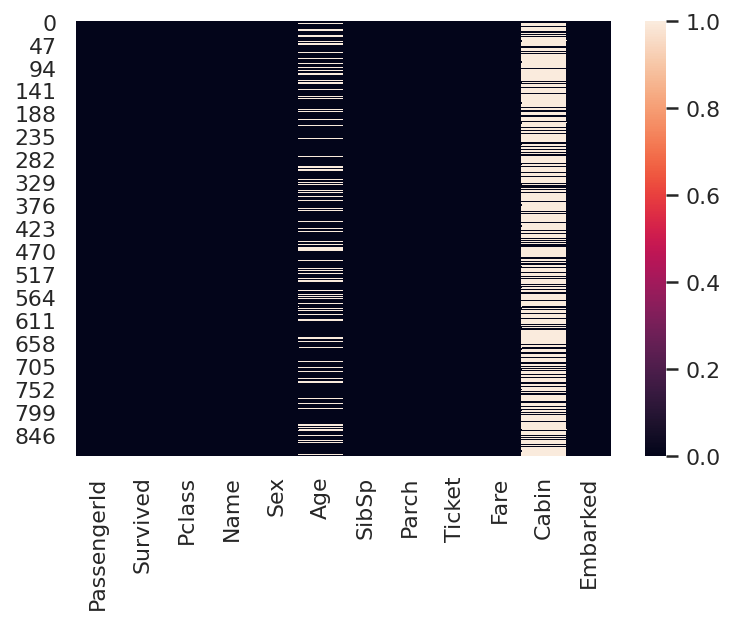

In [ ]:
#결측치 시각화
sns.heatmap(train.isna())

In [ ]:
train.isnull().sum() != 0

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.columns[train.isna().sum() != 0]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train[['Age','Cabin', 'Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [ ]:
#누락 데이터가 있는 열의 데이터 찾기
train1 = train[train.columns[train.isnull().sum()!=0]]
train1

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [ ]:
nag = train.isna().sum() 

In [ ]:
nag = nag[nag != 0 ]

In [ ]:
nag = nag.sort_values()
nag

Embarked      2
Age         177
Cabin       687
dtype: int64

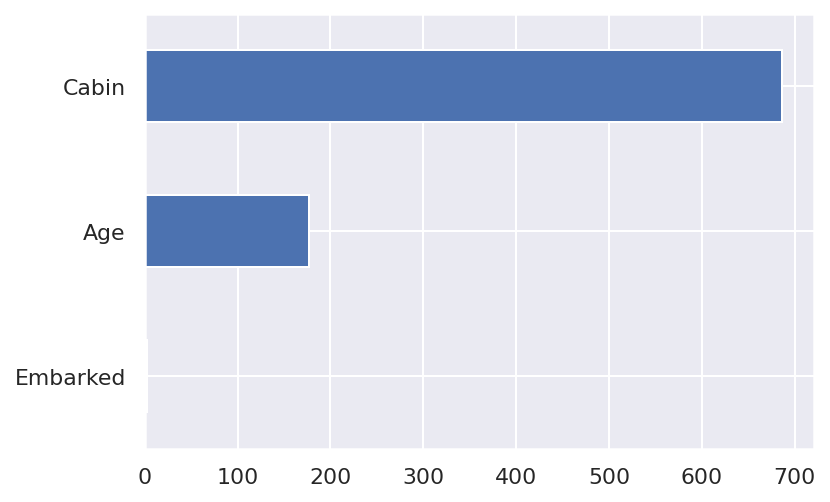

In [ ]:
nag.plot(kind='barh')

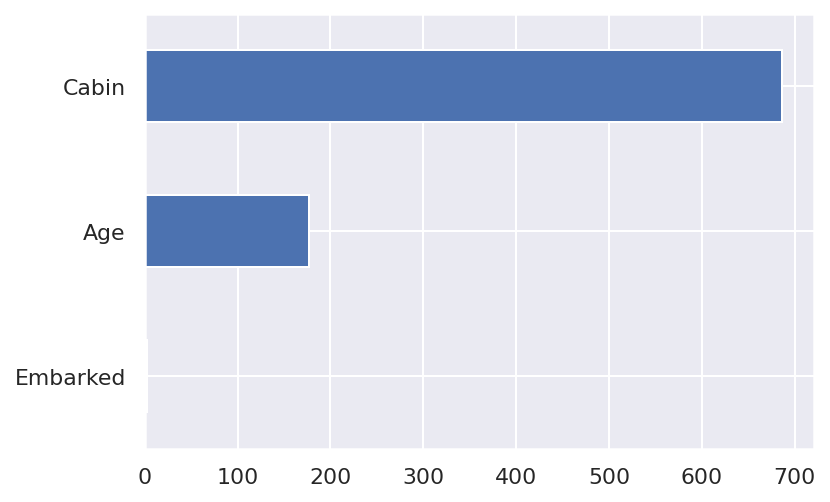

In [ ]:
#누락데이터 열 개수
train_nag = train1.isna().sum().sort_values()
train_nag.plot(kind='barh')

#### ※Cabin(객실번호) 자료가 많이 누락됨을 파악